In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as rep,confusion_matrix as cm

data=pd.read_csv("/content/Liver Patients Dataset.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [0]:
data.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
alkphos,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
is_patient,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


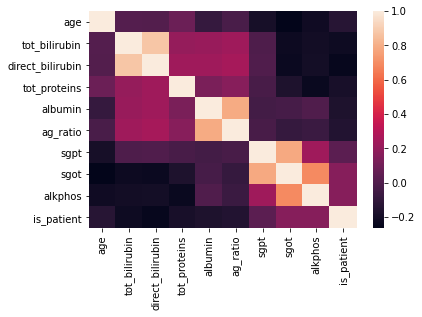

In [0]:
sns.heatmap(data.corr())

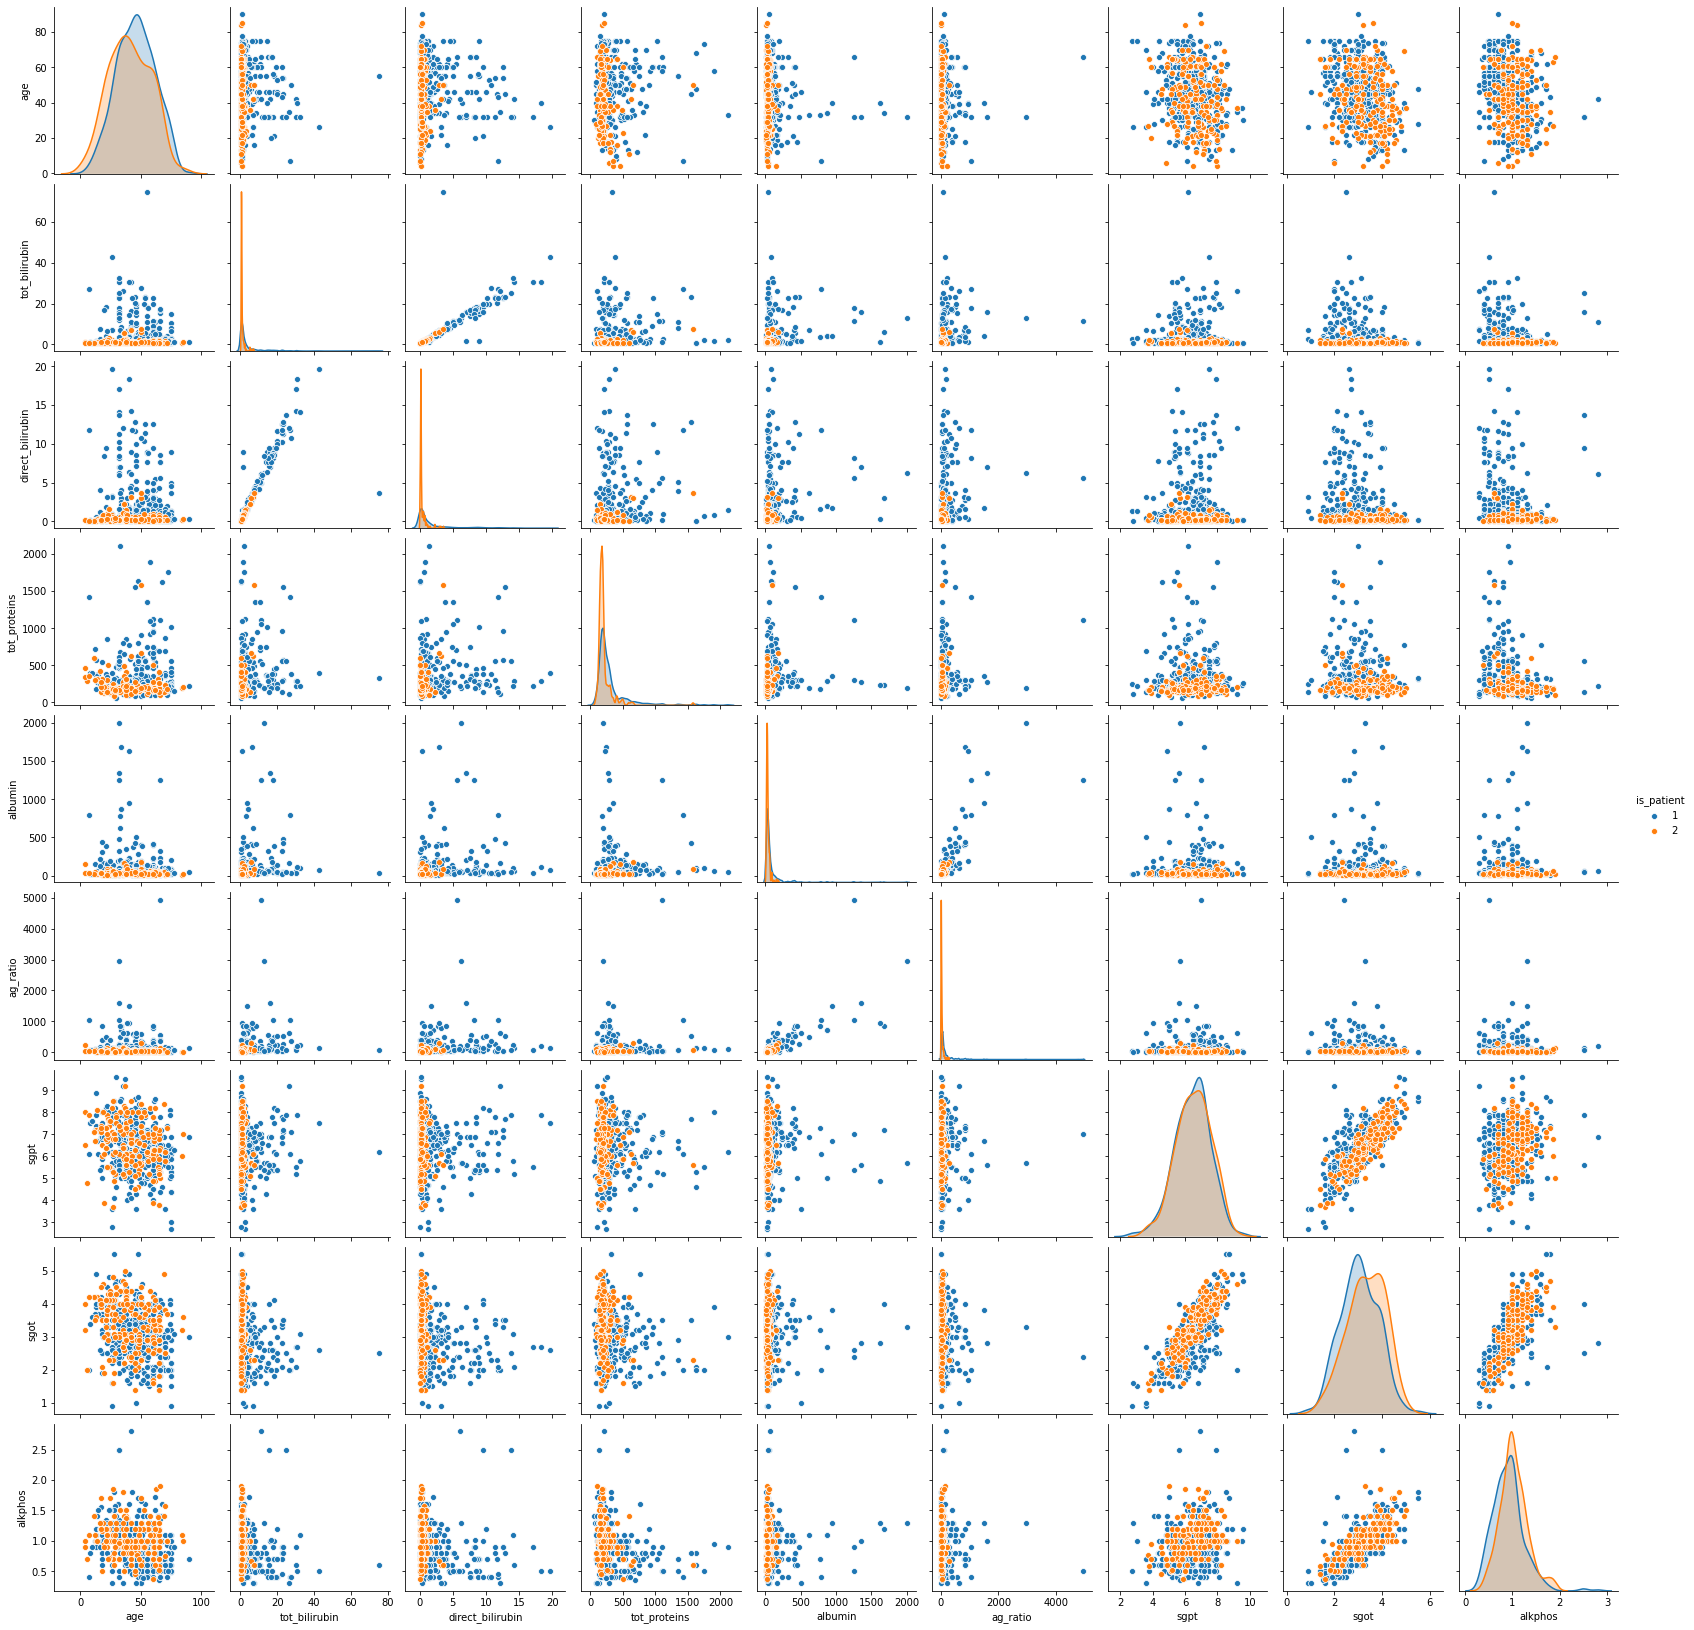

In [0]:
sns.pairplot(data,hue="is_patient",vars=['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins','albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos'])

In [0]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column gender
data["gender"]= label_encoder.fit_transform(data["gender"]) 
data

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [0]:
data.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos              True
is_patient          False
dtype: bool

In [0]:
data["alkphos"] = data["alkphos"].fillna(data["alkphos"].mean())

In [0]:
#Select independent and dependent variables
y= data['is_patient']
x=data.drop(columns=['is_patient'])

In [0]:
# perform normalisation in indeoendent variables
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
Xnorm=scale.fit_transform(x)
print(" normalised data using standarisation ", Xnorm)

 normalised data using standarisation  [[ 1.25209764 -1.76228085 -0.41887783 ...  0.29211961  0.19896867
  -0.14789798]
 [ 1.06663704  0.56744644  1.22517135 ...  0.93756634  0.07315659
  -0.65069686]
 [ 1.06663704  0.56744644  0.6449187  ...  0.47653296  0.19896867
  -0.17932291]
 ...
 [ 0.44843504  0.56744644 -0.4027597  ... -0.0767071   0.07315659
   0.16635131]
 [-0.84978917  0.56744644 -0.32216906 ...  0.29211961  0.32478075
   0.16635131]
 [-0.41704777  0.56744644 -0.37052344 ...  0.75315299  1.58290153
   1.73759779]]


In [0]:
#Splitting the variables into test and training sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(Xnorm,y,test_size = 0.1,random_state=0)

In [0]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
y_pred_log = log_model.predict(x_test) 
   
  
log_model.score(x_test, y_pred_log)*100 

100.0

In [0]:
# XG Boost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
y_pred_xg = xgboost_model.predict(x_test)

xgboost_model.score(x_test , y_pred_xg)*100

100.0

In [0]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_model.score(x_test , y_pred_gb)*100

100.0

In [0]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

#Accuracy

classifier_naive.score(x_test,y_test)*100

59.32203389830508

In [0]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_rfc.fit(x_train, y_train)
y_rfc_pred = classifier_rfc.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_rfc_pred)*100

74.57627118644068

In [0]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_dtc_pred = classifier_dtc.predict(x_test)

#accuracy
accuracy_score(y_test,y_dtc_pred)*100

69.49152542372882

In [0]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train, y_train)
y_svm_pred = classifier_svm.predict(x_test)

#Accuracy
classifier_svm.score(x_test,y_test) *100

76.27118644067797

In [0]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

#accuracy
classifier_svc.score(x_test,y_test)*100

76.27118644067797

In [0]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

classifier_sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifier_sgd.fit(x_train,y_train)
y_sgd_pred = classifier_sgd.predict(x_test)

#accuracy
accuracy_score(y_test,y_sgd_pred)*100

66.10169491525424

In [0]:
#Results of the classifications

con_log = cm(y_test,y_pred_log)
con_xg = cm(y_test,y_pred_xg)
con_gb = cm(y_test,y_pred_gb)
con_naive = cm(y_test,y_naive_pred)
con_rfc = cm(y_test,y_rfc_pred)
con_dtc = cm(y_test,y_dtc_pred)
con_svm = cm(y_test,y_svm_pred)
con_svc = cm(y_test,y_svc_pred)
con_sgd = cm(y_test,y_sgd_pred)


print("LOGISTIC REGRESSION MODEL\n",rep(y_test,y_pred_log),"\n", con_log ,"\n")
print("XG BOOST\n",rep(y_test,y_pred_xg),"\n", con_xg ,"\n")
print("GRADIENT BOOSTING CLASSIFIER\n",rep(y_test,y_pred_gb),"\n", con_gb ,"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n", con_naive ,"\n")
print("RANDOM FOREST CLASSIFIER RESULTS\n",rep(y_test,y_rfc_pred),"\n" , con_rfc, "\n")
print("DECISION TREE RESULTS\n",rep(y_test,y_dtc_pred),"\n" , con_dtc , "\n")
print("SIMPLE SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svm_pred),"\n", con_svm , "\n")
print("KERNEL SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svc_pred),"\n", con_svc , "\n")
print("STOCHASTIC GRADIENT DESCENT RESULTS\n",rep(y_test,y_sgd_pred),"\n", con_sgd , "\n")

LOGISTIC REGRESSION MODEL
               precision    recall  f1-score   support

           1       0.80      0.96      0.87        45
           2       0.60      0.21      0.32        14

    accuracy                           0.78        59
   macro avg       0.70      0.58      0.59        59
weighted avg       0.75      0.78      0.74        59
 
 [[43  2]
 [11  3]] 

XG BOOST
               precision    recall  f1-score   support

           1       0.80      0.91      0.85        45
           2       0.50      0.29      0.36        14

    accuracy                           0.76        59
   macro avg       0.65      0.60      0.61        59
weighted avg       0.73      0.76      0.74        59
 
 [[41  4]
 [10  4]] 

GRADIENT BOOSTING CLASSIFIER
               precision    recall  f1-score   support

           1       0.79      0.84      0.82        45
           2       0.36      0.29      0.32        14

    accuracy                           0.71        59
   macro avg   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
predicted = classifier_svc.predict(x)
data['Predicted is_patient'] = predicted
data[['is_patient','Predicted is_patient']]

,is_patient,Predicted is_patient
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
578,2,1
579,1,1
580,1,1
581,1,1


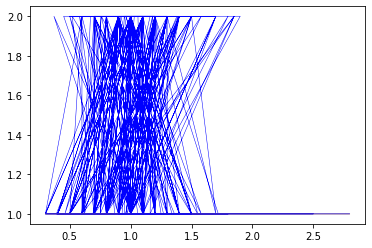

In [0]:
plt.plot(data['alkphos'], data['is_patient'], color="blue" , linewidth="0.5")
plt.plot(data['alkphos'], data['Predicted is_patient'] , color="orange" , linewidth="0.2")

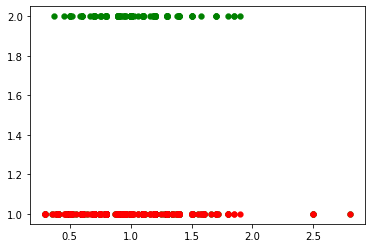

In [0]:
plt.scatter(data['alkphos'], data['is_patient'], color="green" , linewidth="0.3")
plt.scatter(data['alkphos'], data['Predicted is_patient'] , color="red" , linewidth="0.2")